**Requirements:**
1. Our data 'stringer_spontaneous.npy' should be in the same folder with this .ipynb file
2. numpy & matplotlib & sklearn should be installed in your local computer

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#@title Data loading
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (14752 by 8118). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details. 
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other. 
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

### Dimensionality Reduction by PCA

In [8]:
neuron_data = dat['sresp']  # 11983*7018, type is np.ndarray

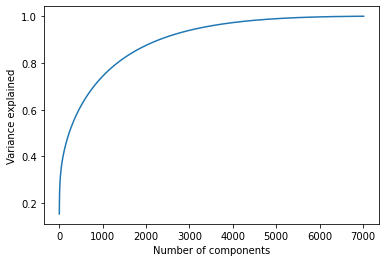

In [13]:
from sklearn.decomposition import PCA

# fugure out which K to choose
pca_full = PCA(n_components=neuron_data.shape[1])
pca_full.fit(neuron_data)
explained_ratio_full = pca_full.explained_variance_ratio_
explained_ratio_full_sum = np.cumsum(explained_ratio_full)

plt.figure()
plt.plot(np.arange(1, len(explained_ratio_full_sum) + 1), explained_ratio_full_sum)
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

In [22]:
# select the first K whose corresponding variance explained >= variance_explained_threshold
variance_explained_threshold = 0.9
k_explain = np.argwhere(explained_ratio_full_sum>=variance_explained_threshold)
k_chosen = k_explain[0][0]

In [23]:
# dimensionality reduction using k_chosen components
pca = PCA(n_components=k_chosen)
neuron_data_reduced = pca.fit_transform(neuron_data)
components = pca.components_  # the weights (new basis)

In [26]:
print('The shape of the reduced data is:', neuron_data_reduced.shape)
print('The shape of the k_chosen components is:', components.shape)

The shape of the reduced data is: (11983, 2308)
The shape of the k_chosen components is: (2308, 7018)


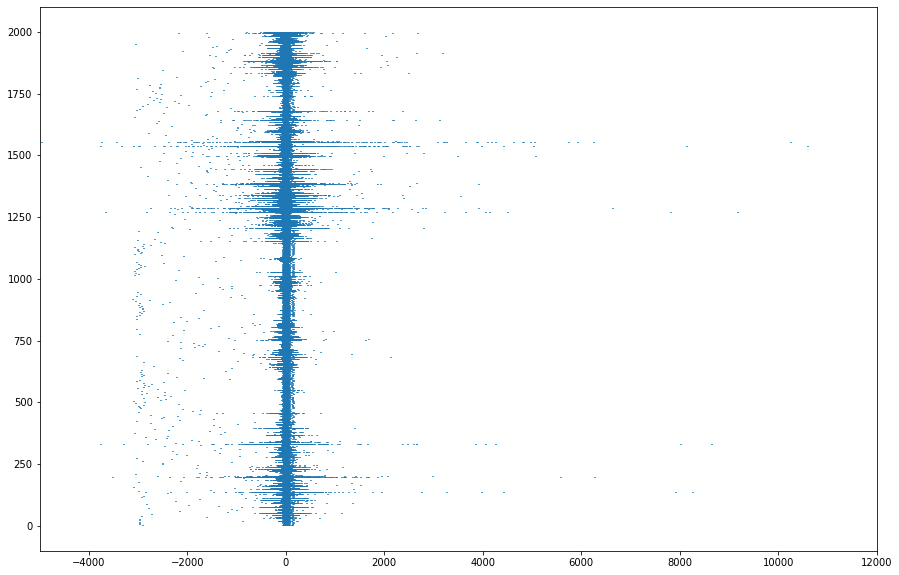

In [32]:
idx = np.arange(len(neuron_data_reduced))
np.random.shuffle(idx)

plt.figure(figsize=(15,10))
plt.eventplot(neuron_data_reduced[:2000])
plt.xlim((-5000,12000))
plt.show()

**We can now use *neuron_data_reduced* $(11983*2308)$ to do further analysis.**